# Análisis de Dosis - GOSS
Este notebook analiza los datos de dosis generados por la simulación GOSS.

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

PATH="../build/Release/goss_sd_dose_merged.csv"
data = pd.read_csv(PATH)
# Column names updated to reflect that 3sigma is for dose per particle
data.columns=['detectorID', 'x', 'y', 'z','dose','dose_per_particle','sigma3_per_particle','n']
data.head()

,detectorID,x,y,z,dose,dose_per_particle,sigma3_per_particle,n
0,3,-8.8,-7.2,109.5,1.156690e-10,1.156690e-14,3.469880e-14,10000
1,11,-8.8,-0.8,109.5,3.393360e-13,3.393360e-17,1.017960e-16,10000
2,12,-8.8,0.0,109.5,3.459810e-12,3.459810e-16,1.037890e-15,10000
3,25,-8.0,-8.0,109.5,7.538090e-11,7.538090e-15,2.261310e-14,10000
4,26,-8.0,-7.2,109.5,2.034680e-11,2.034680e-15,6.103750e-15,10000


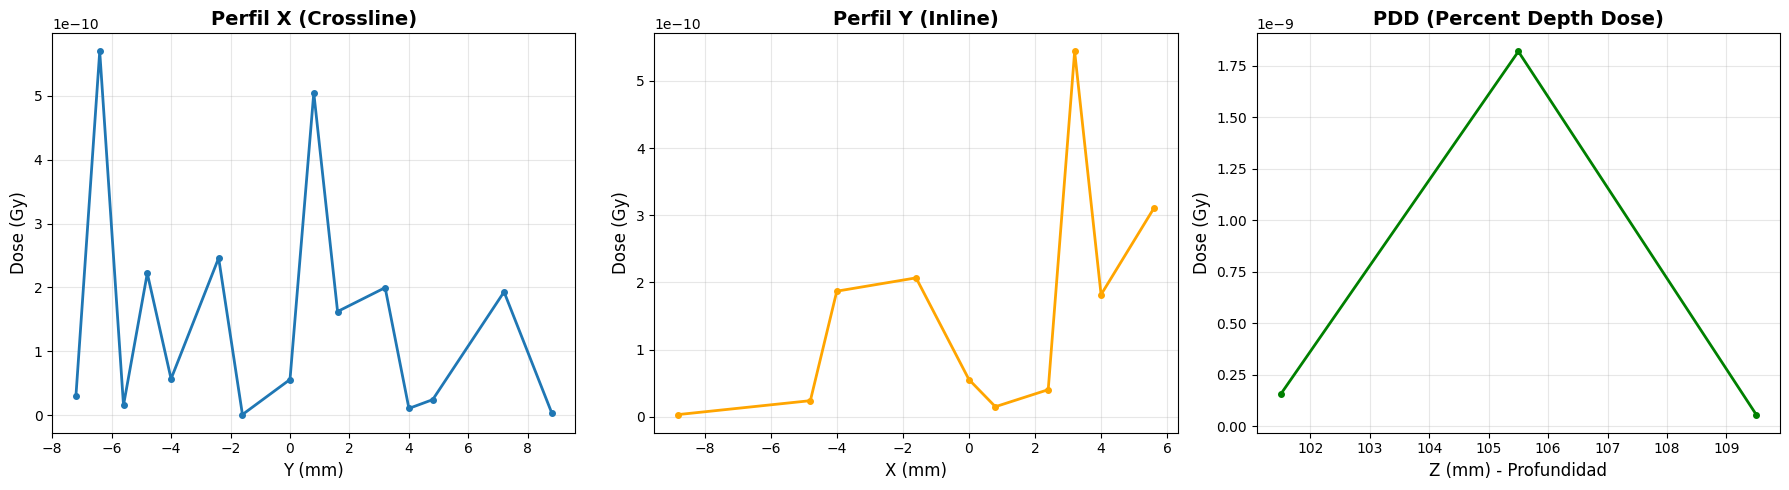

In [28]:
# Crear figura con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

doseDist = data.copy()

# Perfil X (variación en Y, con X=0 y Z=109.5)
profileX = doseDist[(doseDist["x"]==0) & (doseDist["z"]==109.5)].sort_values("y")
axes[0].plot(profileX["y"], profileX["dose"], "-o", linewidth=2, markersize=4)
axes[0].set_xlabel("Y (mm)", fontsize=12)
axes[0].set_ylabel("Dose (Gy)", fontsize=12)
axes[0].set_title("Perfil X (Crossline)", fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Perfil Y (variación en X, con Y=0 y Z=109.5)
profileY = doseDist[(doseDist["y"]==0) & (doseDist["z"]==109.5)].sort_values("x")
axes[1].plot(profileY["x"], profileY["dose"], "-o", linewidth=2, markersize=4, color='orange')
axes[1].set_xlabel("X (mm)", fontsize=12)
axes[1].set_ylabel("Dose (Gy)", fontsize=12)
axes[1].set_title("Perfil Y (Inline)", fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# PDD (variación en Z, con X=0 y Y=0)
profileZ = doseDist[(doseDist["x"]==0) & (doseDist["y"]==0)].sort_values("z")
axes[2].plot(profileZ["z"], profileZ["dose"], "-o", linewidth=2, markersize=4, color='green')
axes[2].set_xlabel("Z (mm) - Profundidad", fontsize=12)
axes[2].set_ylabel("Dose (Gy)", fontsize=12)
axes[2].set_title("PDD (Percent Depth Dose)", fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de Phase Space (IAEA)
Análisis de archivos IAEA phase space usando ParticlePhaseSpace

TypeError: Load_IAEA.__init__() missing 2 required positional arguments: 'constants' and 'input_data'